In [41]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv
import re
import seaborn; seaborn.set()
%matplotlib inline

#https://benchmarksgame-team.pages.debian.net/benchmarksgame/description/knucleotide.html#knucleotide

In [42]:
with open('main_data.csv') as f:
    f_csv = csv.reader(f)
    headers = next(f_csv)
    print(headers )
        

['name', 'lang', 'id', 'n', 'size(B)', 'cpu(s)', 'mem(KB)', 'status', 'load', 'elapsed(s)', 'busy(s)']


In [43]:
data = pd.read_csv('main_data.csv')
data_r = data.iloc[:,[0,1,7,9]]
data_lang = data_r[data_r['lang'].isin([]
                                    #+['gcc','gpp','java','node','rust','csharpcore','ghc']
                                    #+['go','typescript']
                                    #+['ghc','hipe','openj9','sbcl','fsharpcore']
                                    +['ghc','fsharpcore']
                                    #+['gpp','gcc','rust','go']
                                    )]
data_lang = data_lang[data_lang['elapsed(s)'] != 0]
data_lang = data_lang[data_lang['status'] >= 0]

data_binarytrees   = data_lang[data_lang['name']=='binarytrees'].groupby('lang').min().sort_values(by=['lang'])
data_fannkuchredux = data_lang[data_lang['name']=='fannkuchredux'].groupby('lang').min().sort_values(by=['lang'])
data_fasta         = data_lang[data_lang['name']=='fasta'].groupby('lang').min().sort_values(by=['lang'])
data_knucleotide   = data_lang[data_lang['name']=='knucleotide'].groupby('lang').min().sort_values(by=['lang'])
data_mandelbrot    = data_lang[data_lang['name']=='mandelbrot'].groupby('lang').min().sort_values(by=['lang'])
data_nbody         = data_lang[data_lang['name']=='nbody'].groupby('lang').min().sort_values(by=['lang'])
data_pidigits      = data_lang[data_lang['name']=='pidigits'].groupby('lang').min().sort_values(by=['lang'])
data_regexredux    = data_lang[data_lang['name']=='regexredux'].groupby('lang').min().sort_values(by=['lang'])
data_revcomp       = data_lang[data_lang['name']=='revcomp'].groupby('lang').min().sort_values(by=['lang'])
data_spectralnorm  = data_lang[data_lang['name']=='spectralnorm'].groupby('lang').min().sort_values(by=['lang'])

#data_fasta_c = data_fasta['elapsed(s)']/data_fasta['elapsed(s)'].min()
data_regexredux

,name,status,elapsed(s)
lang,,,
fsharpcore,regexredux,0,8.029
ghc,regexredux,0,1.780


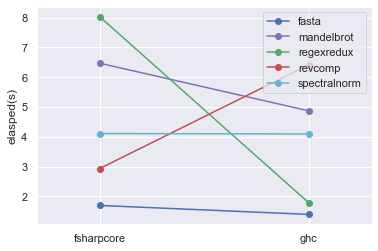

In [44]:
#plt.style.use('seaborn-whitegrid')
#fig=plt.hist(data_fasta['elapsed(s)'], histtype='bar', color='steelblue')
fig=plt.figure()
plt.plot(data_fasta['elapsed(s)'],'-ob', label='fasta') 
#plt.plot(data_binarytrees['elapsed(s)'],'-og')
#plt.plot(data_fannkuchredux['elapsed(s)'],'-or') 
#plt.plot(data_knucleotide['elapsed(s)'],'-oc') 
plt.plot(data_mandelbrot['elapsed(s)'],'-om', label='mandelbrot')
#plt.plot(data_nbody['elapsed(s)'],'-oy') 
#plt.plot(data_pidigits['elapsed(s)'],'-ok', label='pidigits')
plt.plot(data_regexredux['elapsed(s)'],'-og', label='regexredux')
plt.plot(data_revcomp['elapsed(s)'],'-or', label='revcomp')
plt.plot(data_spectralnorm['elapsed(s)'],'-oc', label='spectralnorm')
plt.ylabel('elasped(s)')
plt.xlim(-0.3,1.3)


plt.legend(loc=0);
"""
plt.subplot(2,1,1)
plt.title('Fasta')
plt.ylabel('elapsed(s)')
plt.ylim(0,5)
plt.plot(data_fasta['elapsed(s)'],'-ok')

plt.subplot(2,1,2)
plt.plot([1,2,3],[2,3,4])
"""
fig.savefig('data_1(Functional2).png')

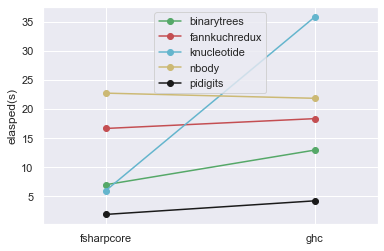

In [45]:
#plt.style.use('seaborn-whitegrid')
fig2=plt.figure()
plt.plot(data_binarytrees['elapsed(s)'],'-og', label='binarytrees')
plt.plot(data_fannkuchredux['elapsed(s)'],'-or', label='fannkuchredux') 
plt.plot(data_knucleotide['elapsed(s)'],'-oc', label='knucleotide') 
plt.plot(data_nbody['elapsed(s)'],'-oy', label='nbody') 
plt.plot(data_pidigits['elapsed(s)'],'-ok', label='pidigits')
plt.ylabel('elasped(s)')
plt.xlim(-0.3,1.3)

plt.legend(loc=0);

fig2.savefig('data_2(Functional2).png')
